In [1]:
import flask
import sklearn
import pandas
import numpy
import matplotlib
import seaborn
import xgboost

print(f"Flask version: {flask.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Numpy version: {numpy.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

Flask version: 2.3.3
scikit-learn version: 1.3.0
Pandas version: 2.0.3
Numpy version: 1.24.3
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
XGBoost version: 1.7.6


In [2]:
# Manipulations & Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer

# Feature Selection
from sklearn.feature_selection import SelectKBest,chi2

# Algorithm
from xgboost import XGBClassifier

#Pipeline
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Others
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [3]:
df = pd.read_csv("Invistico_Airline.csv")
df.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
62130,satisfied,Female,disloyal Customer,22,Business travel,Business,2316,5,3,5,...,3,3,1,3,5,4,4,3,0,0.0
128709,satisfied,Female,Loyal Customer,45,Business travel,Eco Plus,828,5,3,5,...,4,5,5,5,5,3,5,2,0,13.0
33837,satisfied,Male,Loyal Customer,15,Personal Travel,Eco,2718,4,3,4,...,4,4,2,2,4,2,4,4,0,0.0
69811,dissatisfied,Male,Loyal Customer,25,Business travel,Business,2552,1,5,5,...,1,1,4,1,3,3,3,1,0,0.0
69286,dissatisfied,Male,Loyal Customer,60,Business travel,Business,2837,2,1,1,...,4,2,2,1,2,1,2,1,3,0.0


In [4]:
df.shape

(129880, 23)

In [5]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df = df.dropna()

# I am dropping missing values since its a very tiny portion compared to 129880 records.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [8]:
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

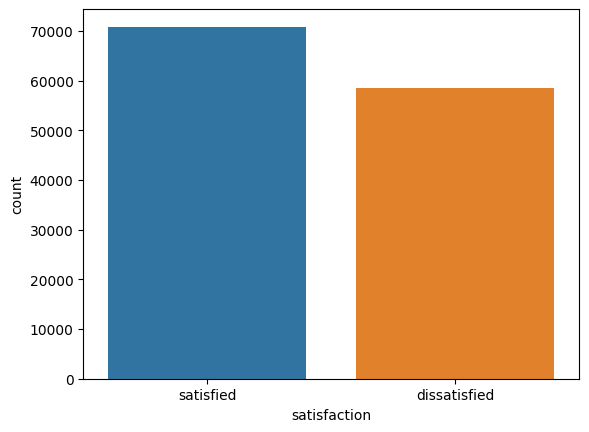

In [9]:
sns.countplot(x=df['satisfaction'])

# Target is alomst balanced. 

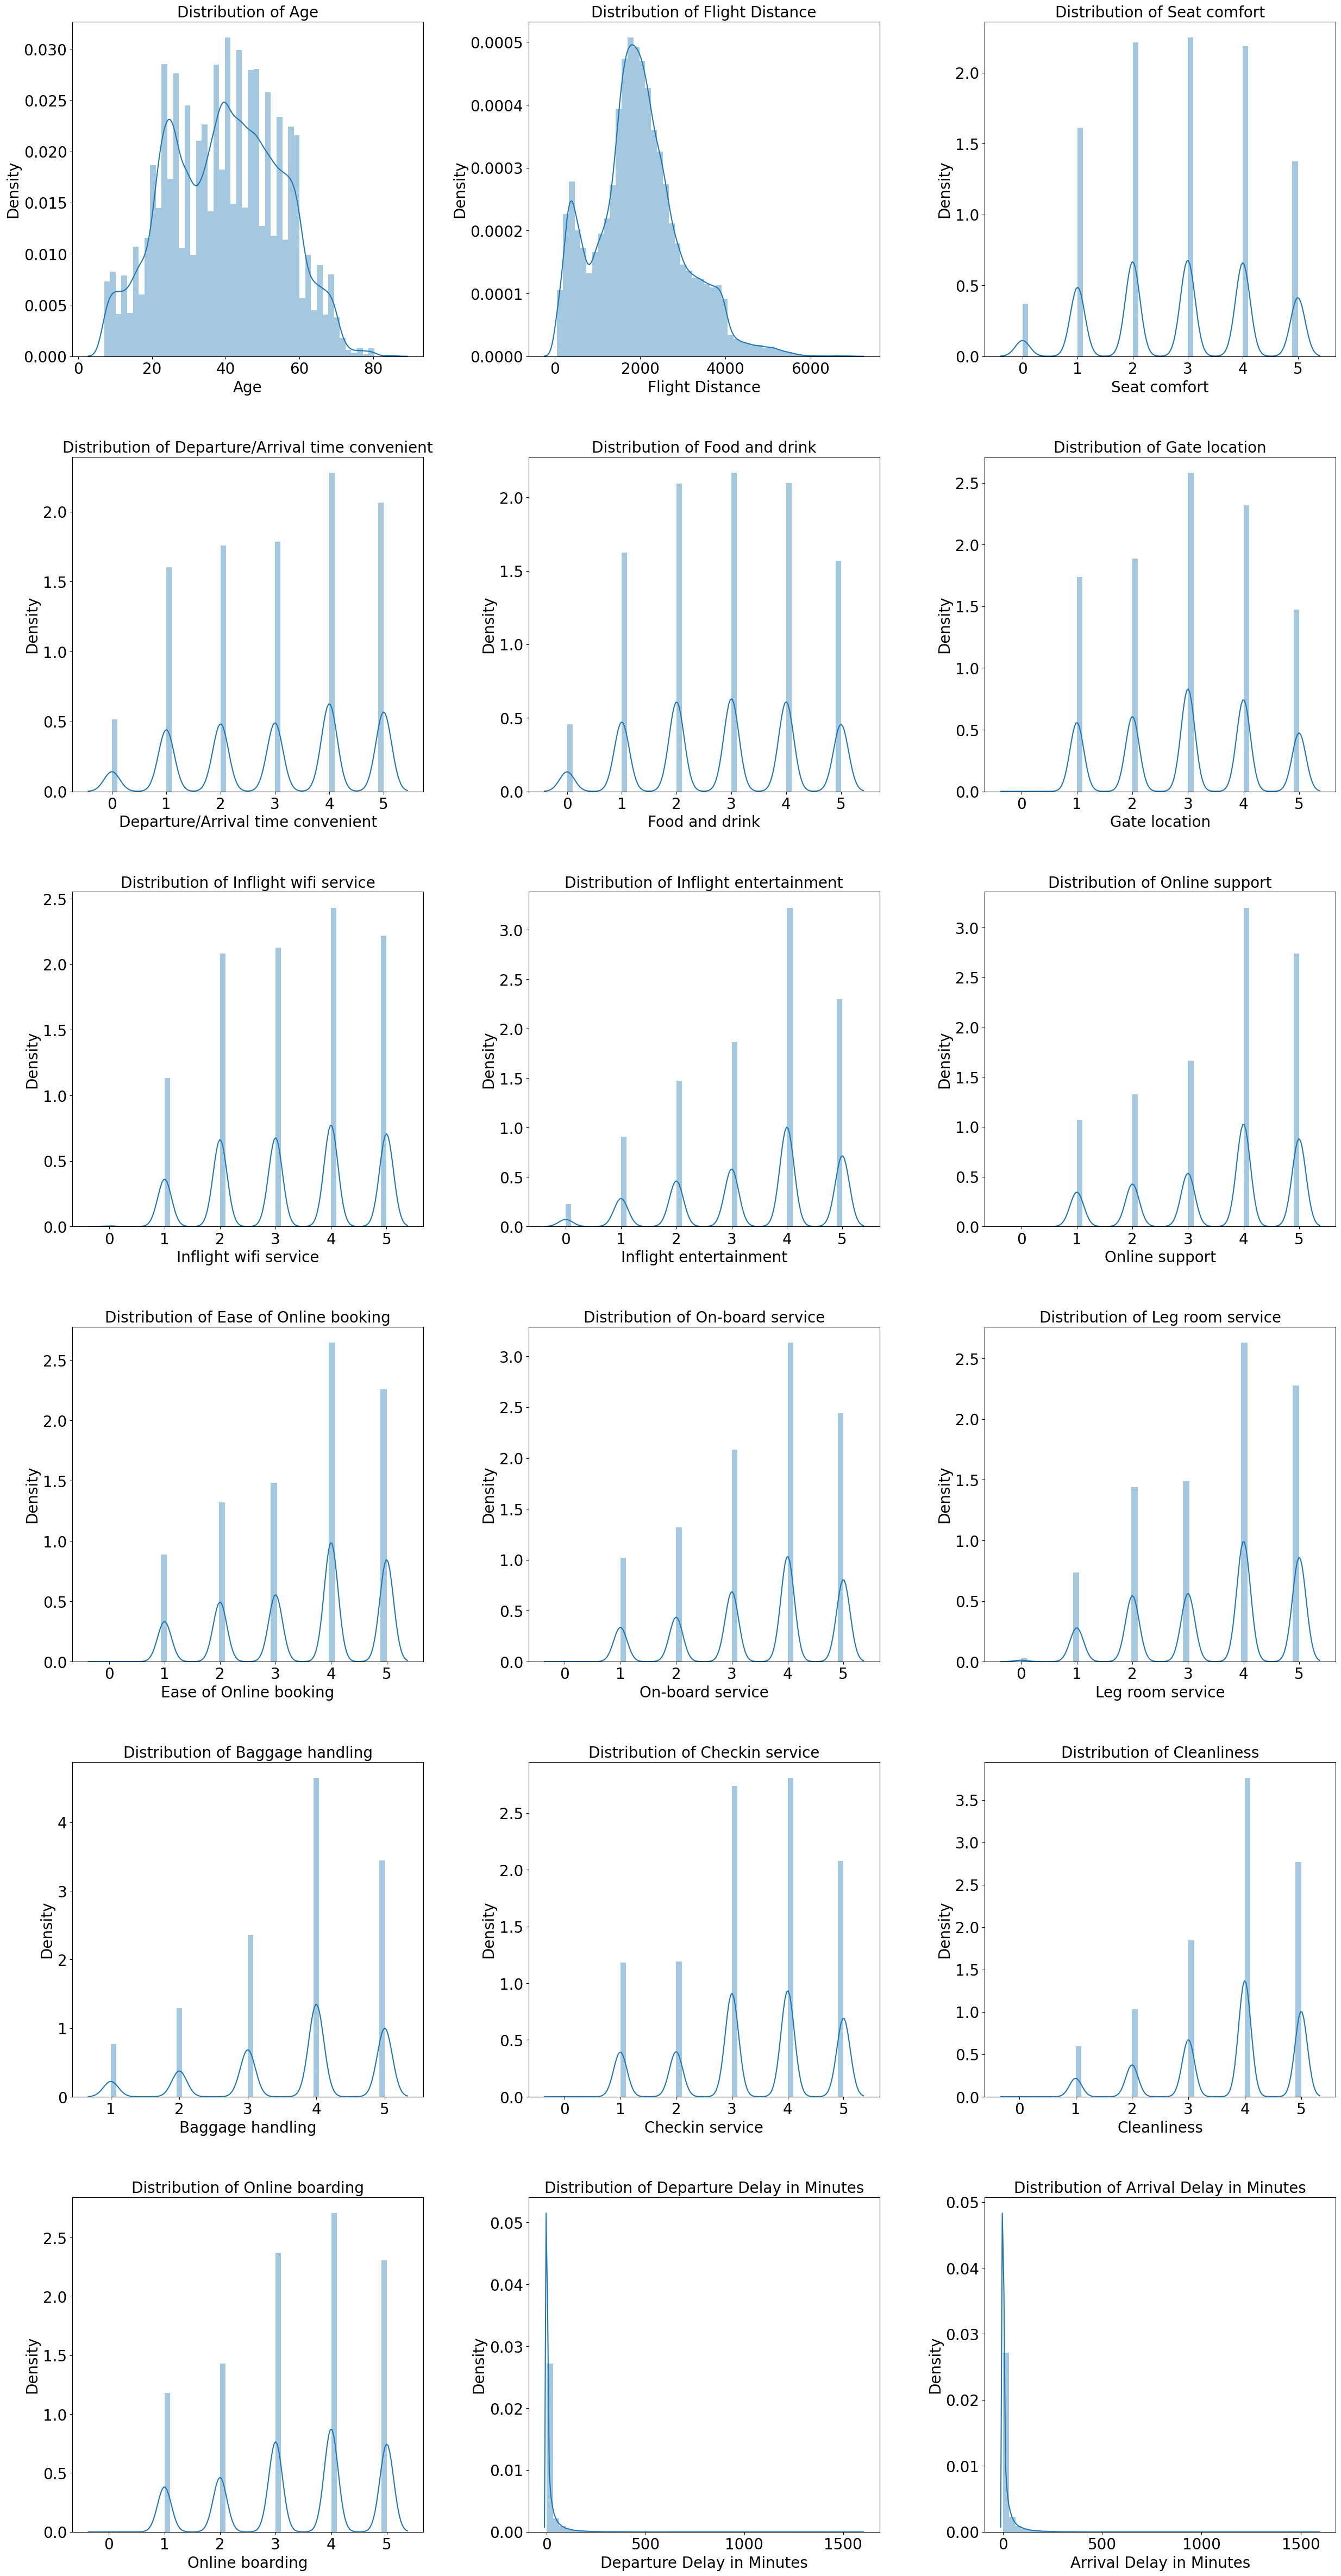

In [10]:
nrows = 6
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10))

for i, j in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    row = i // ncols
    col_idx = i % ncols
    sns.distplot(x=df[j], ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(j, fontsize=20)
    axes[row, col_idx].set_ylabel('Density', fontsize=20)
    axes[row, col_idx].tick_params(axis='both', labelsize=20)
    axes[row, col_idx].set_title(f'Distribution of {j}', fontsize=20)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

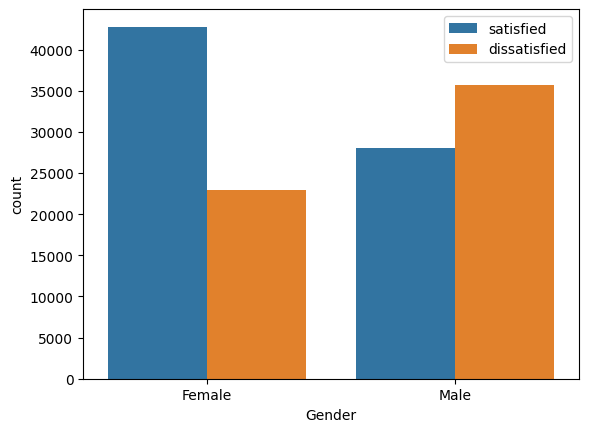

In [11]:
sns.countplot(x=df['Gender'],hue=df['satisfaction'])
plt.legend(loc='best')

# Women seem to be more satisfied than men in general.

<Axes: xlabel='Customer Type', ylabel='count'>

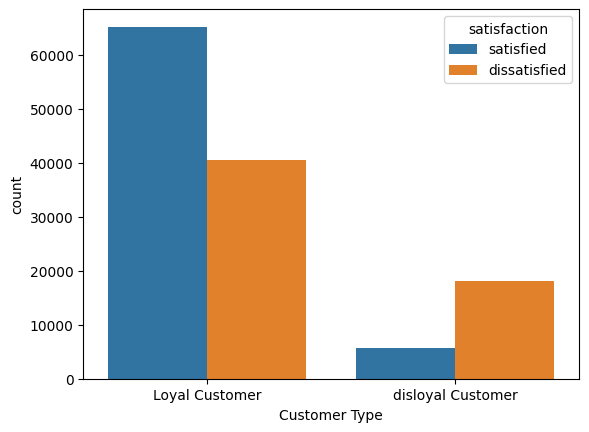

In [12]:
sns.countplot(x=df['Customer Type'],hue=df['satisfaction'])

# There seemed to be a lot of growing disastisfaction among loyal customers than disloyal. 
# We need to focus more on loyal customers as retaining them is more crucial than disloyal customers for the airline. 

<Axes: xlabel='Class', ylabel='count'>

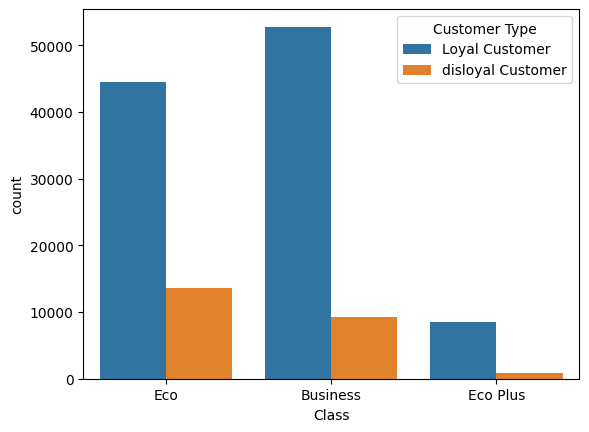

In [13]:
sns.countplot(hue=df['Customer Type'],x=df['Class'])

# there seem to be slightly more disloyal customers in Eco class than others. 

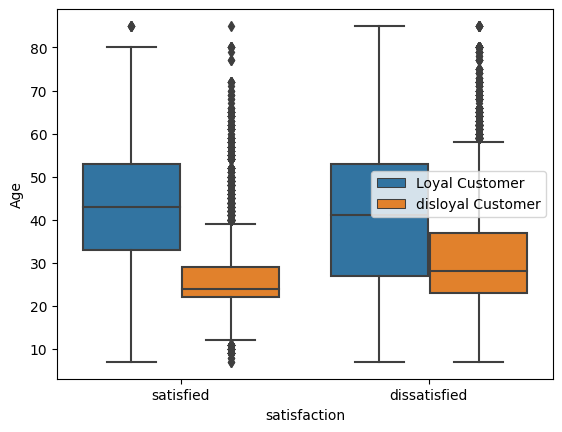

In [14]:
sns.boxplot(y=df['Age'],x=df['satisfaction'],hue=df['Customer Type'])
plt.legend(loc='best')

# There seem to be larger proportion of people who are disastisfied as well as disloyal. 
# It makes sense for disloyal customers to be disastisfied. 
# However, at the same time there are larger proportion of loyal customers who are dissatisfied as well. 

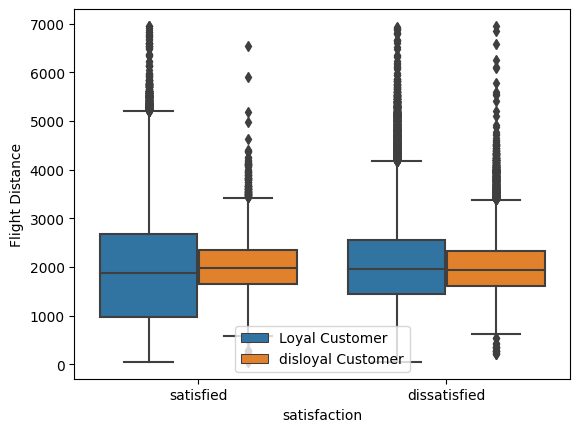

In [15]:
sns.boxplot(y=df['Flight Distance'],x=df['satisfaction'],hue=df['Customer Type'])
plt.legend(loc='best')

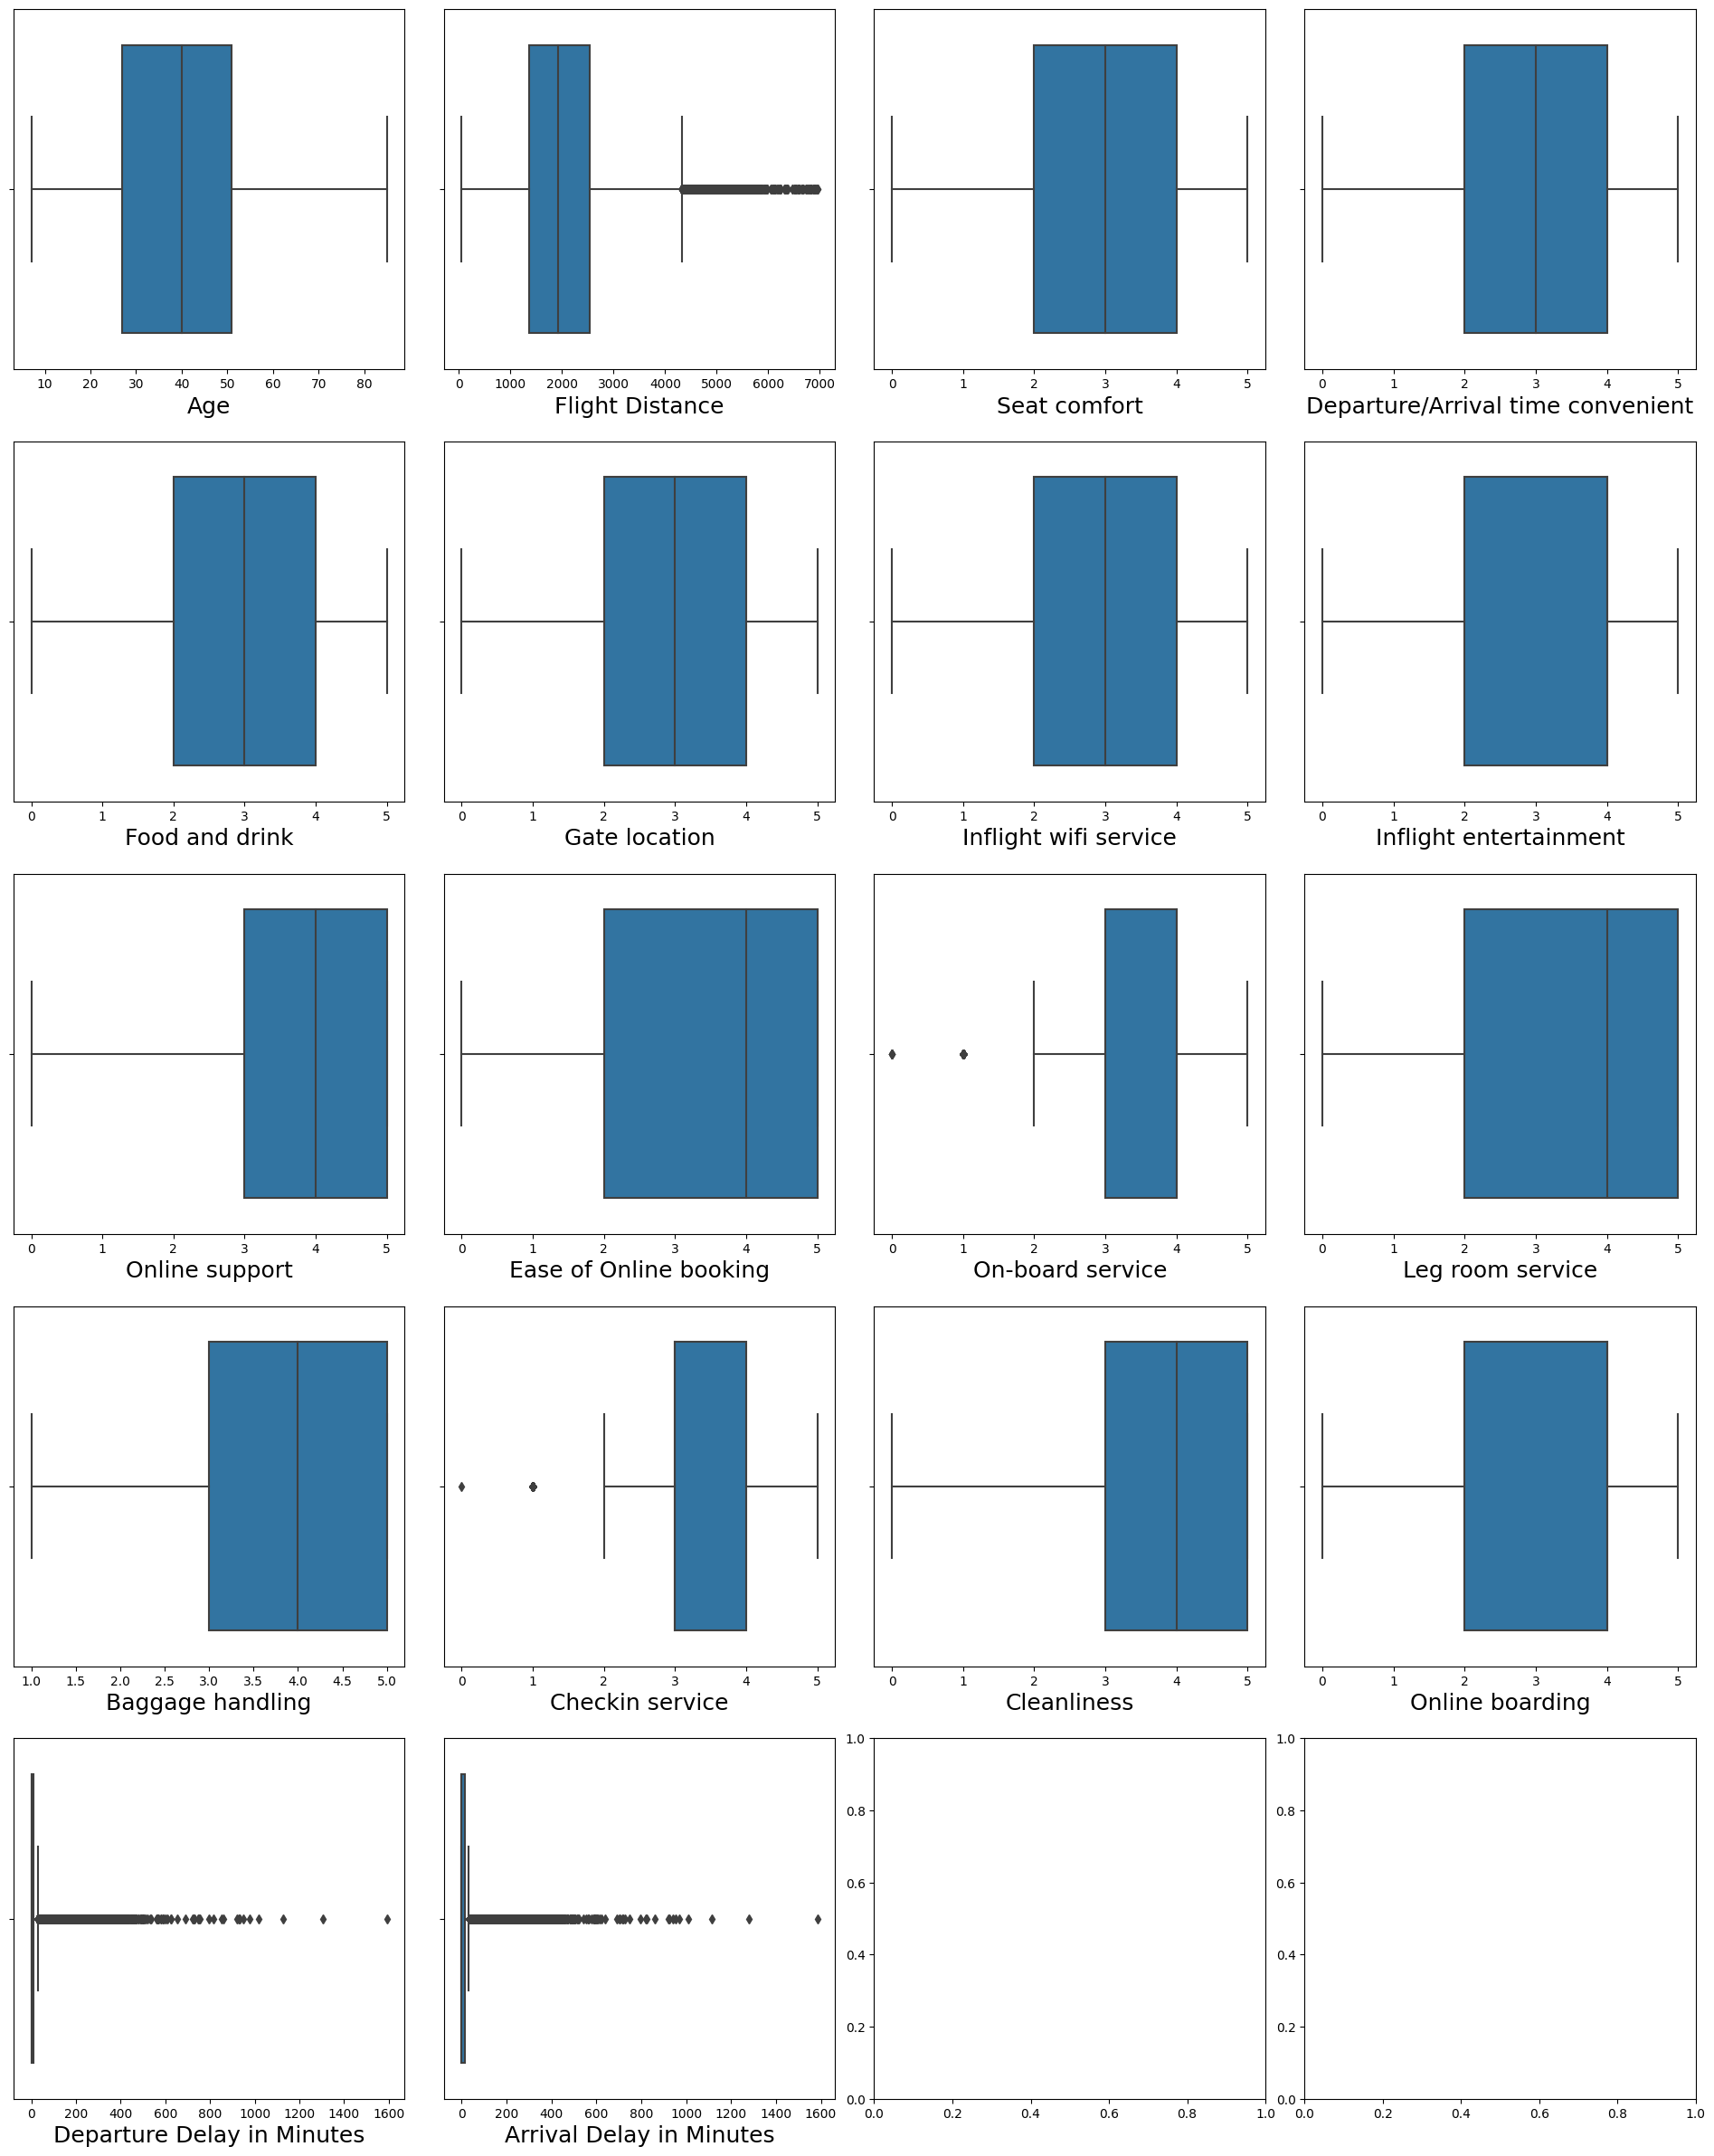

In [16]:
nrows = 5
ncols = 4

fig,axes = plt.subplots(nrows = nrows, ncols=ncols, figsize = (ncols*6, nrows*6))

for i, j in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    row = i // ncols
    col_idx = i % ncols
    sns.boxplot(x=df[j], ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(j, fontsize=18)

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [17]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [20]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [21]:
trf1 = ColumnTransformer([
    ('oe_cust_class', OrdinalEncoder(categories=[['disloyal Customer', 'Loyal Customer'],
                                                 ['Eco', 'Eco Plus', 'Business']],
                                    handle_unknown='use_encoded_value', unknown_value=-1), [1, 4]),
    ('ohe_sex_travel',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,3]),

], remainder='passthrough')

In [22]:
trf2 = SelectKBest(score_func=chi2,k=8)

In [23]:
# trf3 = XGBClassifier(booster = 'gbtree',learning_rate= 0.1, max_depth=7,n_estimators=200)

trf3 = XGBClassifier(booster = 'gbtree',learning_rate= 0.1, max_depth=10,n_estimators=50)

In [24]:
final_pipeline = Pipeline([
    ('trf1', trf1),
    ('scaler', MinMaxScaler()),
    ('trf2', trf2),
    ('trf3', trf3),
])

In [25]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_cust_class',
                                                  OrdinalEncoder(categories=[['disloyal '
                                                                              'Customer',
                                                                              'Loyal '
                                                                              'Customer'],
                                                                             ['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [1, 4]),
                                                 ('ohe_sex_travel',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 3])])),
                ('scaler', Min...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [26]:
y_pred = final_pipeline.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [28]:
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.886078022980974
ROC AUC: 0.8848848713413985
Precision: 0.893694232164966
Recall: 0.8979880742996869
F1 Score: 0.8958360080455343
Confusion Matrix:


array([[16930,  2490],
       [ 2378, 20933]], dtype=int64)

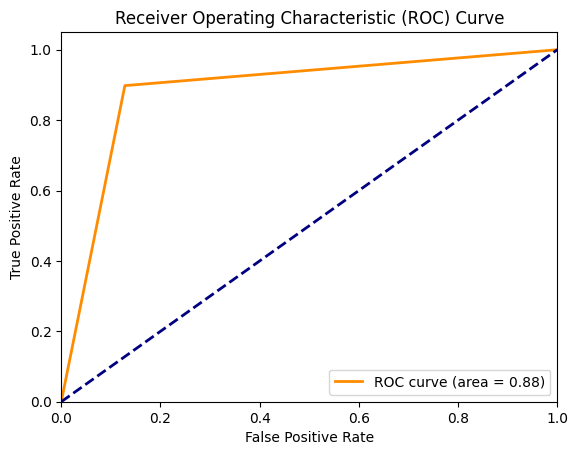

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
cv_scores = cross_val_score(final_pipeline, x_train,y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.88704472 0.88715348 0.89032332 0.88772981 0.88951645]
Mean Cross-Validation Accuracy: 0.8883535583572005


In [31]:
params = {
    'trf3__max_depth': [10,50],
    'trf3__learning_rate': [0.01,0.1],
    'trf3__n_estimators': [25,50,100],
}               
    
# Hyperparameters didn't really increase the accuracy so didn't bother much with it or perhaps i am lacking with the right way

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(final_pipeline, params, cv=5,scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oe_cust_class',
                                                                         OrdinalEncoder(categories=[['disloyal '
                                                                                                     'Customer',
                                                                                                     'Loyal '
                                                                                                     'Customer'],
                                                                                                    ['Eco',
                                                                                                     'Eco '
                                                                                                     'Plus',
                                                                                                     'Business']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [1,
                                                                          4]),
                                                                        ('ohe_sex_travel',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=Fa...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=10,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=50,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'trf3__learning_rate': [0.01, 0.1],
                         'trf3__max_depth': [10, 50],
                         'trf3__n_estimators': [25, 50, 100]},
             scoring='accuracy')

In [33]:
grid.best_score_

0.8883535583572005

In [34]:
grid.best_params_

{'trf3__learning_rate': 0.1, 'trf3__max_depth': 10, 'trf3__n_estimators': 50}

In [35]:
import pickle

# Save the entire final_pipeline object
with open('XGBoost_Model.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)